In [1]:
from rdkit import Chem
from rdkit.Chem import Draw

In [2]:
smiles_to_draw = ["O=c1cc[nH]c(=O)[nH]1", "Oc1ccnc(O)n1", "", "O=c1ccnc(O)[nH]1", "O=c1nccc(O)[nH]1", "O=c1nc(O)cc[nH]1", "O=c1cc[nH]c(O)n1"]

Note in practice there could be empty smiles string...

O=c1cc[nH]c(=O)[nH]1


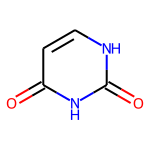

Oc1ccnc(O)n1


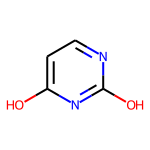

O=c1ccnc(O)[nH]1


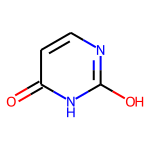

O=c1nccc(O)[nH]1


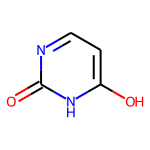

O=c1nc(O)cc[nH]1


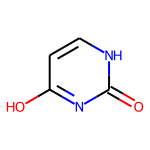

O=c1cc[nH]c(O)n1


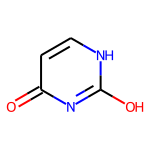

In [10]:
#Loop over all smiles to draw and convert molecule to scheme

#Plot in notebook
for this_smiles in smiles_to_draw:
    if this_smiles != "":
        print(this_smiles)
        img = Draw.MolToImage(Chem.MolFromSmiles(this_smiles), size = (150, 150)) #key step
        display(img)

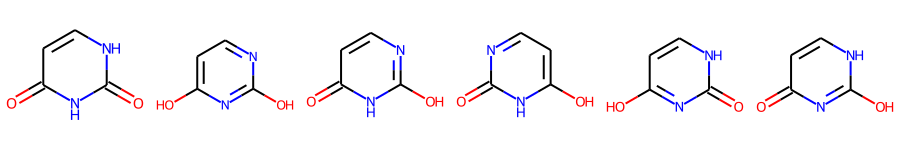

In [9]:
#plot in one figure
from PIL import Image
#create subplot
images = []
sub_x = 150
sub_y = 150
for this_smiles in smiles_to_draw:
    if this_smiles != "":
        # print(this_smiles)
        img = Draw.MolToImage(Chem.MolFromSmiles(this_smiles), size = (sub_x, sub_y))
        images.append(img) # key step

#create a big image
big_img = Image.new('RGB', (sub_x * len(images), sub_y)) #size determined by number of subplot and sizeof individual plot
for i in range(len(images)):
    big_img.paste(images[i], (i*sub_x, 0)) #second one is the coordinate, x is scaled by the sizeof individual plot

display(big_img)

#to save
#big_img.save('img_name.png')
    

In [15]:
#rdkit.Chem.Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(200, 200), legends=None, highlightAtomLists=None, highlightBondLists=None, useSVG=False, returnPNG=False, **kwargs)
mols = [sm for sm in smiles_to_draw if sm] #only return non-empty sm
# print(mols)
img = Draw.MolsToGridImage(mols, molsPerRow = len(mols), subImgSize = (200,200))
display(img)

TypeError: No registered converter was able to extract a C++ pointer to type class RDKit::ROMol from this Python object of type str

In [ ]:
#save the figure to local directory

#name the figure and save
figure_idx = 1
comp_name = "uracil"
for this_smiles in smiles_to_draw:
    if this_smiles != "":
        file_name = f"img_{comp_name}_{figure_idx}.png"
        Draw.MolToFile(Chem.MolFromSmiles(this_smiles), file_name)
        figure_idx += 1

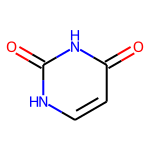

In [11]:
#compare to the standard structure
import requests
res = requests.get('https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/1174/property/isomericsmiles/txt')
img = Draw.MolToImage( Chem.MolFromSmiles( res.text.rstrip() ), size=(150, 150) )
img